# **`Importing Libraries`**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [49]:
#loading the data
df = pd.read_csv('BankChurners.csv')

In [50]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311,0.000055,0.99994
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066,0.000123,0.99988
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048,0.000086,0.99991
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113,0.000045,0.99996
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144,0.000303,0.99970


There are some 'Unknown' values present in the columns of Education_Level, Marital_Status and Income_Category in the dataset, which we will drop in order to increase the accuracy of data.

In [51]:
df = df[df != 'Unknown'].dropna()

Finding number of rows and columns

In [52]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 7081
Number of columns: 23


In [53]:
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',	'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1,inplace=True)

In [54]:
df.set_index('CLIENTNUM',inplace=True)
df.reset_index(inplace=True)
df.drop('CLIENTNUM',axis=1,inplace=True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7081 entries, 0 to 7080
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            7081 non-null   object 
 1   Customer_Age              7081 non-null   int64  
 2   Gender                    7081 non-null   object 
 3   Dependent_count           7081 non-null   int64  
 4   Education_Level           7081 non-null   object 
 5   Marital_Status            7081 non-null   object 
 6   Income_Category           7081 non-null   object 
 7   Card_Category             7081 non-null   object 
 8   Months_on_book            7081 non-null   int64  
 9   Total_Relationship_Count  7081 non-null   int64  
 10  Months_Inactive_12_mon    7081 non-null   int64  
 11  Contacts_Count_12_mon     7081 non-null   int64  
 12  Credit_Limit              7081 non-null   float64
 13  Total_Revolving_Bal       7081 non-null   int64  
 14  Avg_Open

Checking for duplicates

In [56]:
df.duplicated().sum()

0

## Summary Statistics

In [57]:
df_num = df.select_dtypes(['int','Float64'])
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,7081.0,46.347691,8.041225,26.0,41.000,46.000,52.000,73.000
Dependent_count,7081.0,2.337805,1.291649,0.0,1.000,2.000,3.000,5.000
Months_on_book,7081.0,35.981359,8.002609,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,7081.0,3.819376,1.544444,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,7081.0,2.342607,0.995104,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,7081.0,2.454456,1.104917,0.0,2.000,2.000,3.000,6.000
Credit_Limit,7081.0,8492.773831,9126.072520,1438.3,2498.000,4287.000,10729.000,34516.000
Total_Revolving_Bal,7081.0,1167.501624,812.315606,0.0,463.000,1282.000,1781.000,2517.000
Avg_Open_To_Buy,7081.0,7325.272207,9131.217585,3.0,1248.000,3250.000,9491.000,34516.000
Total_Amt_Chng_Q4_Q1,7081.0,0.760584,0.223139,0.0,0.629,0.735,0.858,3.397


**Takeaways**

1. A customer on an average is expected to be 46 years old. The customers are between the ages of 26 and 73 years.
2. A customer is expected to have a dependent count of 2.
3. On an average a customer is expected to be on books for 36 months.
4. A customer must have a total of 4 relationships with the credit card provider.
5. The average credit limit provided by the credit card provider or the financial institution is 8,492.77 dollars. The standard deviation is high, which is due to the fact that the different credit card users have different credit card limits. It is visible from the range o the credit card limit which is between 1,438 dollars and 34,516 dollars.
6. On an average a customer is expected to have a total transaction amount of 4394.299816 dollars.
7. On an average a customer is expected to have a total transaction count of 65.

# **`Exploratory Data Analysis`**

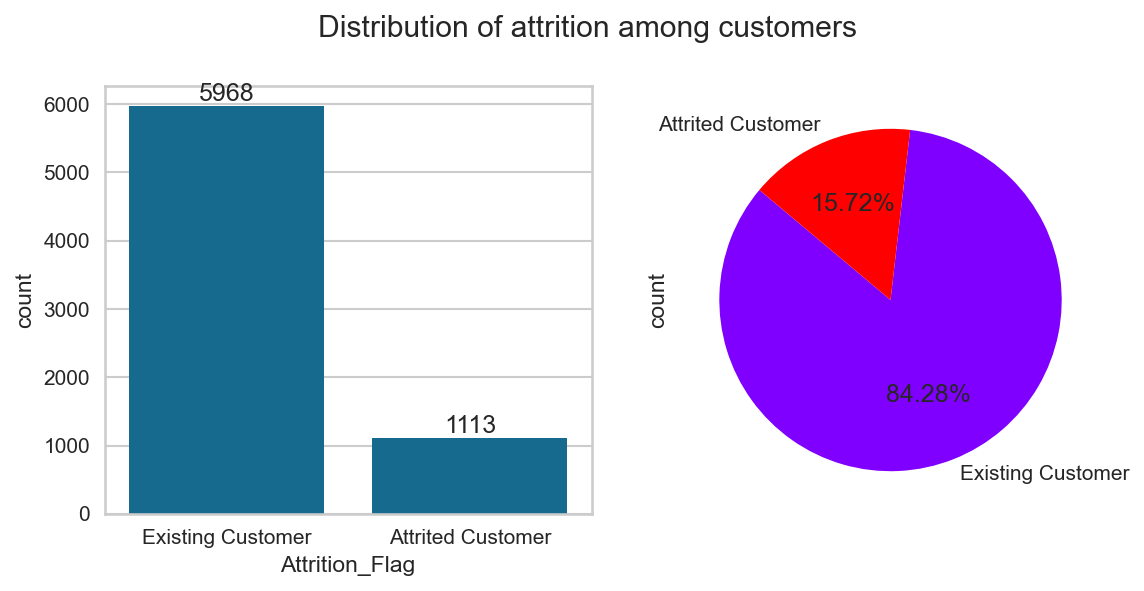

In [58]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of attrition among customers')

a= sns.countplot(data=df,x='Attrition_Flag',ax=axes[0])
for i in a.containers: a.bar_label(i,)
axes[0].xaxis
df['Attrition_Flag'].value_counts().plot(kind='pie',autopct="%1.2f%%",startangle=140,ax=axes[1],cmap='rainbow')

fig.tight_layout();

The above plots perfectly capture the percentage of attrited and existed customers. Around 16% customers have attrited from using the credit cards.

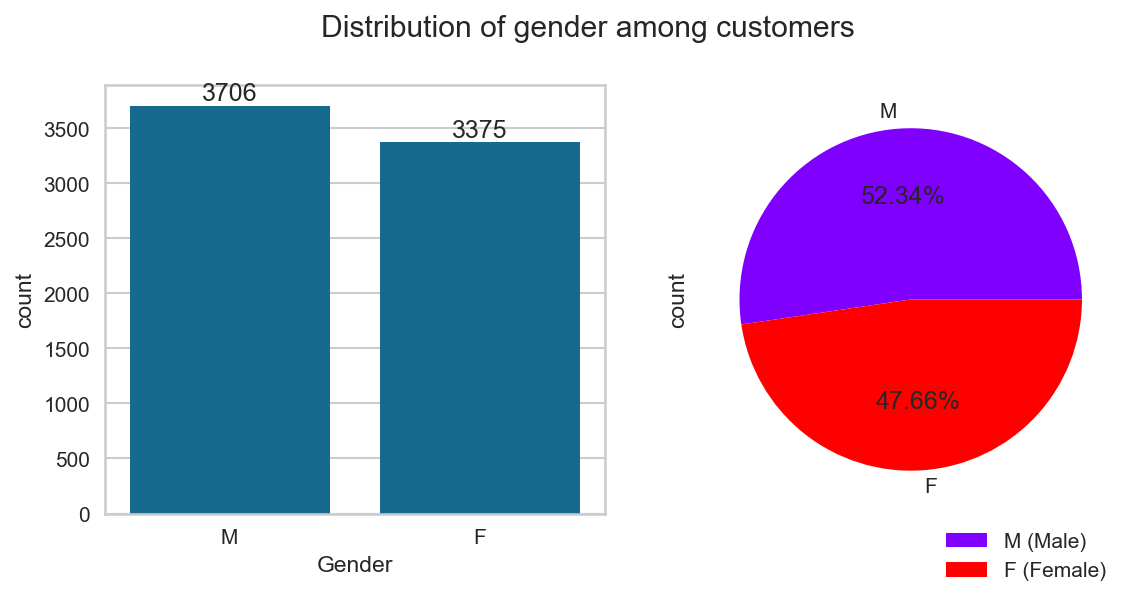

In [59]:
fig,axes = plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of gender among customers')
a = sns.countplot(data=df,x='Gender',ax=axes[0])
for i in a.containers: a.bar_label(i,)

df['Gender'].value_counts().plot(kind='pie',autopct='%1.2f%%',ax=axes[1],cmap='rainbow')
axes[1].legend(['M (Male)', 'F (Female)'],bbox_to_anchor=(1, 0))
fig.tight_layout();

We get a somewhat balanced ratio on the basis of gender among the customers.

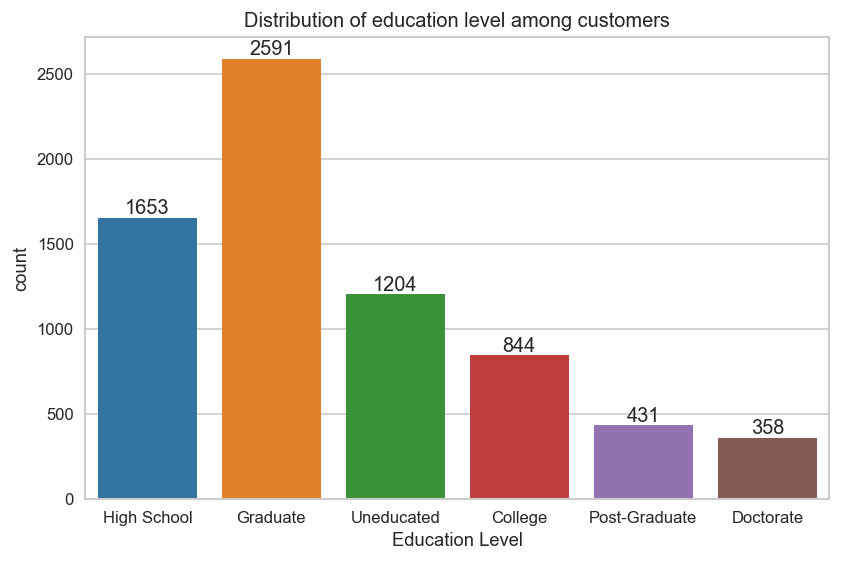

In [60]:
plt.figure(figsize=(8,5),dpi=120)
plt.title('Distribution of education level among customers')
a = sns.countplot(data=df,x='Education_Level',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.xlabel('Education Level');

Major customers are those having a graduate degree.

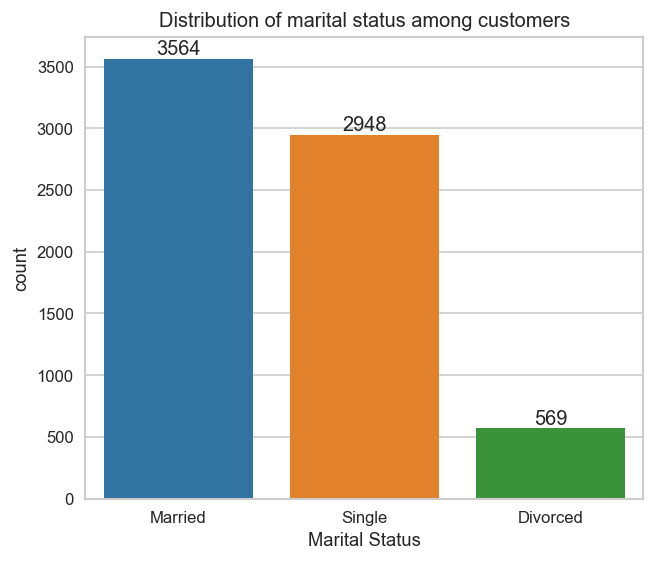

In [61]:
plt.figure(figsize=(6,5),dpi=120)
plt.title('Distribution of marital status among customers')
a = sns.countplot(data=df,x='Marital_Status',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.xlabel('Marital Status');

Most of the customers are married, with a very few divorcees. 

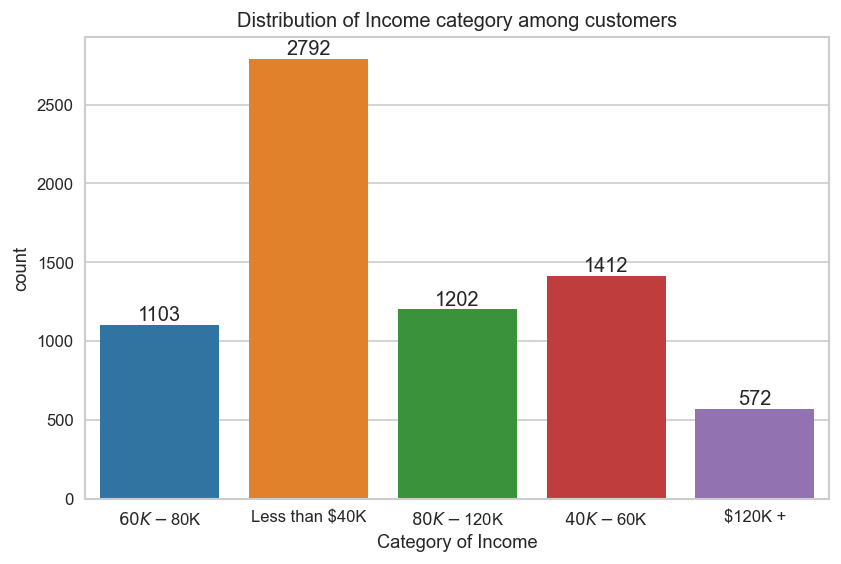

In [62]:
plt.figure(figsize=(8,5),dpi=120)
plt.title('Distribution of Income category among customers')
a = sns.countplot(data=df,x='Income_Category',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.xlabel('Category of Income');

People who have an annual income less than $40K are major customers applying for a credit card.

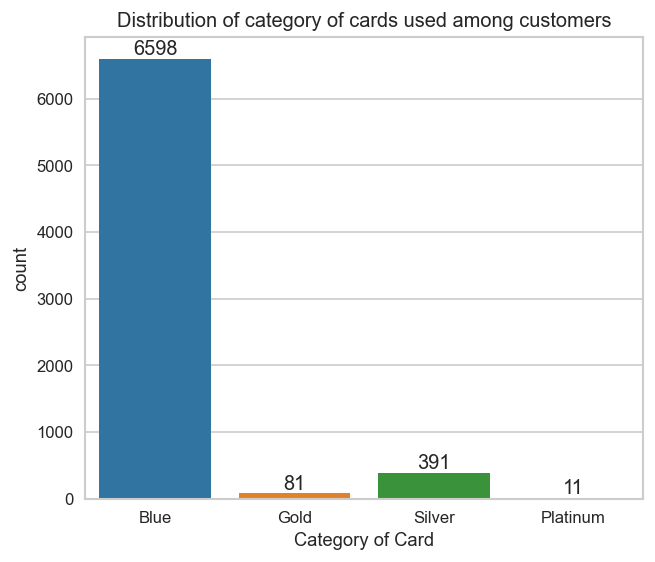

In [63]:
plt.figure(figsize=(6,5),dpi=120)
plt.title('Distribution of category of cards used among customers')
a = sns.countplot(data=df,x='Card_Category',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.xlabel('Category of Card');

Blue cards are the most popular, while Platinum cards are the least.

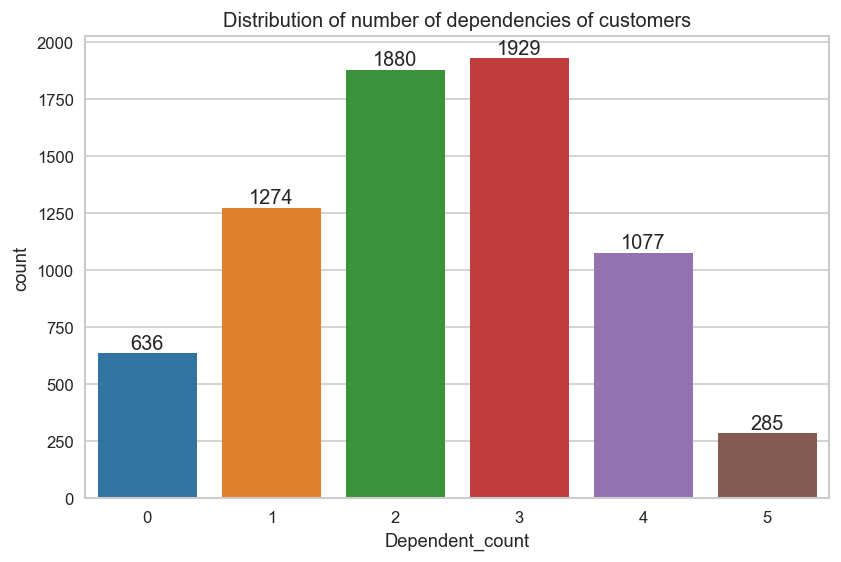

In [64]:
plt.figure(figsize=(8,5),dpi=120)
plt.title('Distribution of number of dependencies of customers')
a = sns.countplot(data=df,x='Dependent_count',palette='tab10')
for i in a.containers: a.bar_label(i,);

The highest number of dependencies that majority of the customer has is 3.

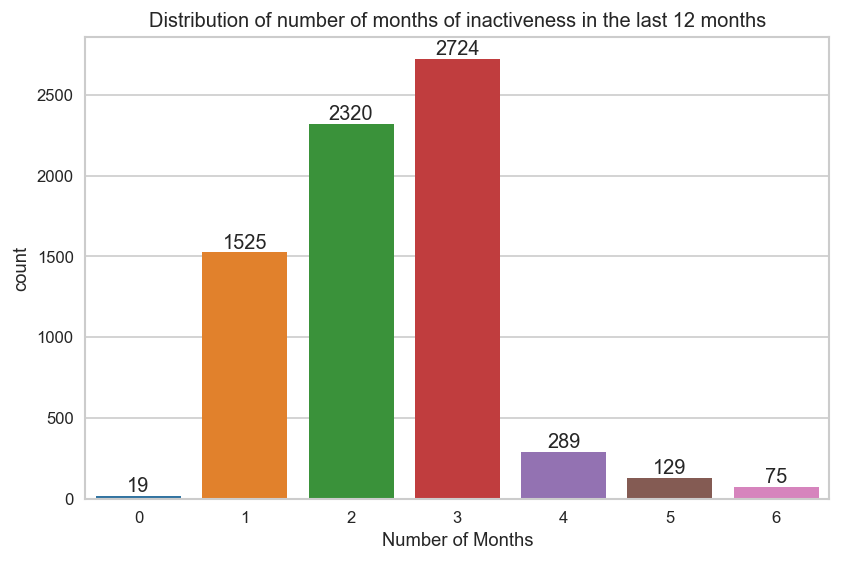

In [65]:
plt.figure(figsize=(8,5),dpi=120)
plt.title('Distribution of number of months of inactiveness in the last 12 months')
a = sns.countplot(data=df,x='Months_Inactive_12_mon',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.xlabel('Number of Months');

Around 2724 of the customers have been inactive for the last 3 months. Only 75 customers have been inactive for 6 months. Vey few customers are active.

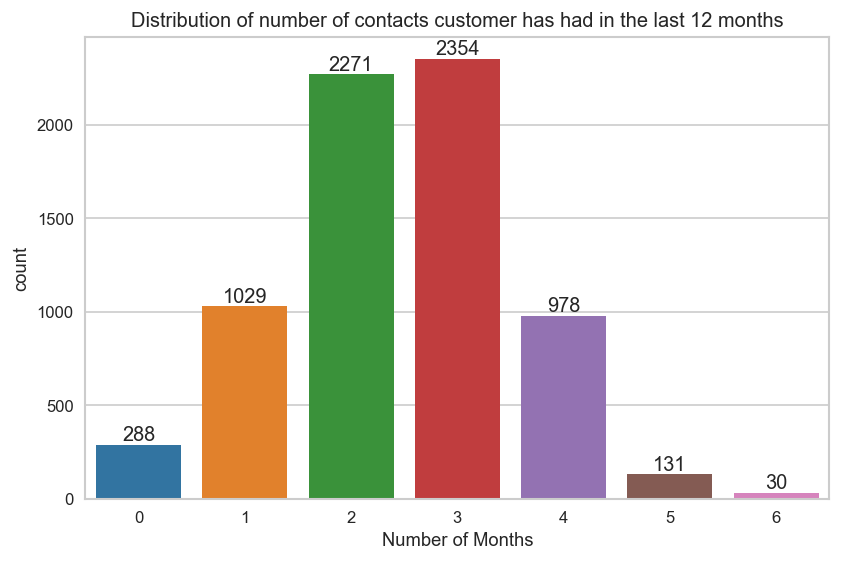

In [66]:
plt.figure(figsize=(8,5),dpi=120)
plt.title('Distribution of number of contacts customer has had in the last 12 months')
a = sns.countplot(data=df,x='Contacts_Count_12_mon',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.xlabel('Number of Months');

2354 customers contacted thrice with the credit card provider, while around 30 customers contacted 6 times with the credit card provider.

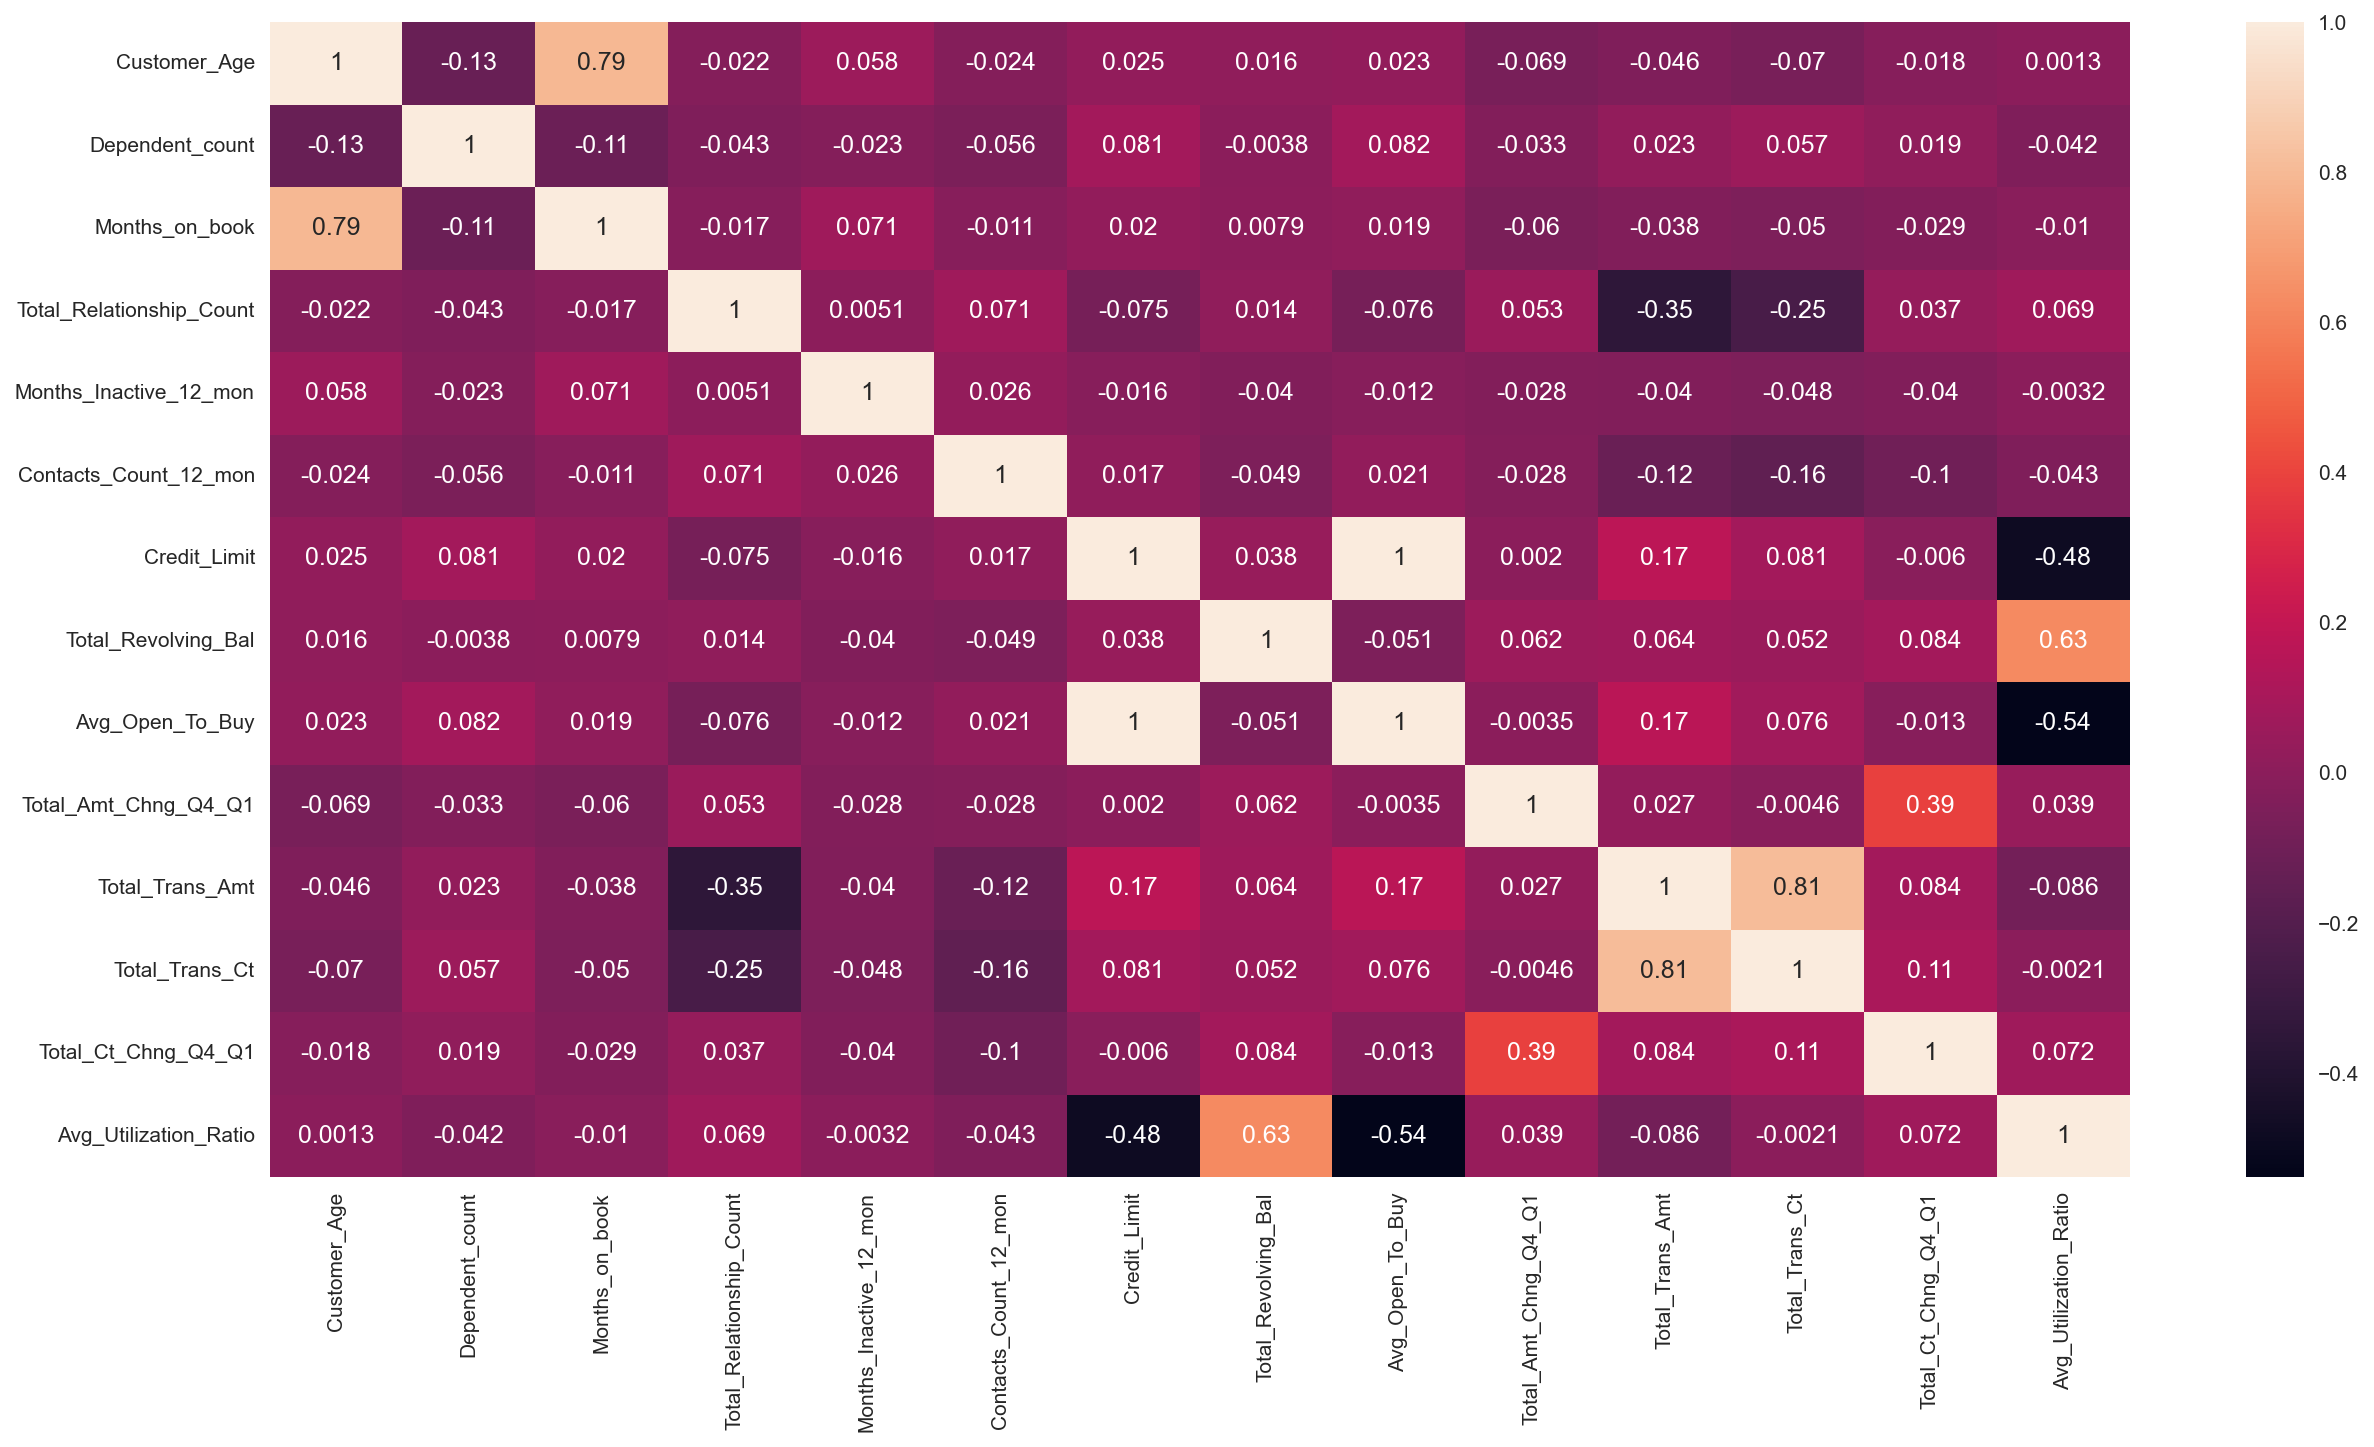

In [67]:
plt.figure(figsize=(20,10),dpi=150)
sns.heatmap(df_num.corr(),annot=True);

**Takeaways**
1. Customer Age has a high positive relation (0.79) with the Months on book. This is due to the fact that as customers get old, they are meant to be on the books for long than young customers.
2. Total transaction amount has a strong positive correlation (0.81) with the total transaction count because the more a customer transacts money using his card, the more the number of transaction counts will increase.
3. Utilization ratio is the amount of revolving credit one is using divided by the total credit that is available to him. So Average Utilisation ratio has a high positive correlation (0.63) with the total revolving bill. This is also the reason why Credit Limit has a significant negative correlation (-0.48) with the average utilization ratio.
4. 'Open to buy' means the difference between the credit limit assigned to a cardholder account and the present balance on the account. Since Utilisation ratio is depends indirectly on credit limit. So Open to buy also indirectly depends on Utilisation ratio. This is why they have a negative correlation.

Now we will try to see the distribution of each numerical feature.

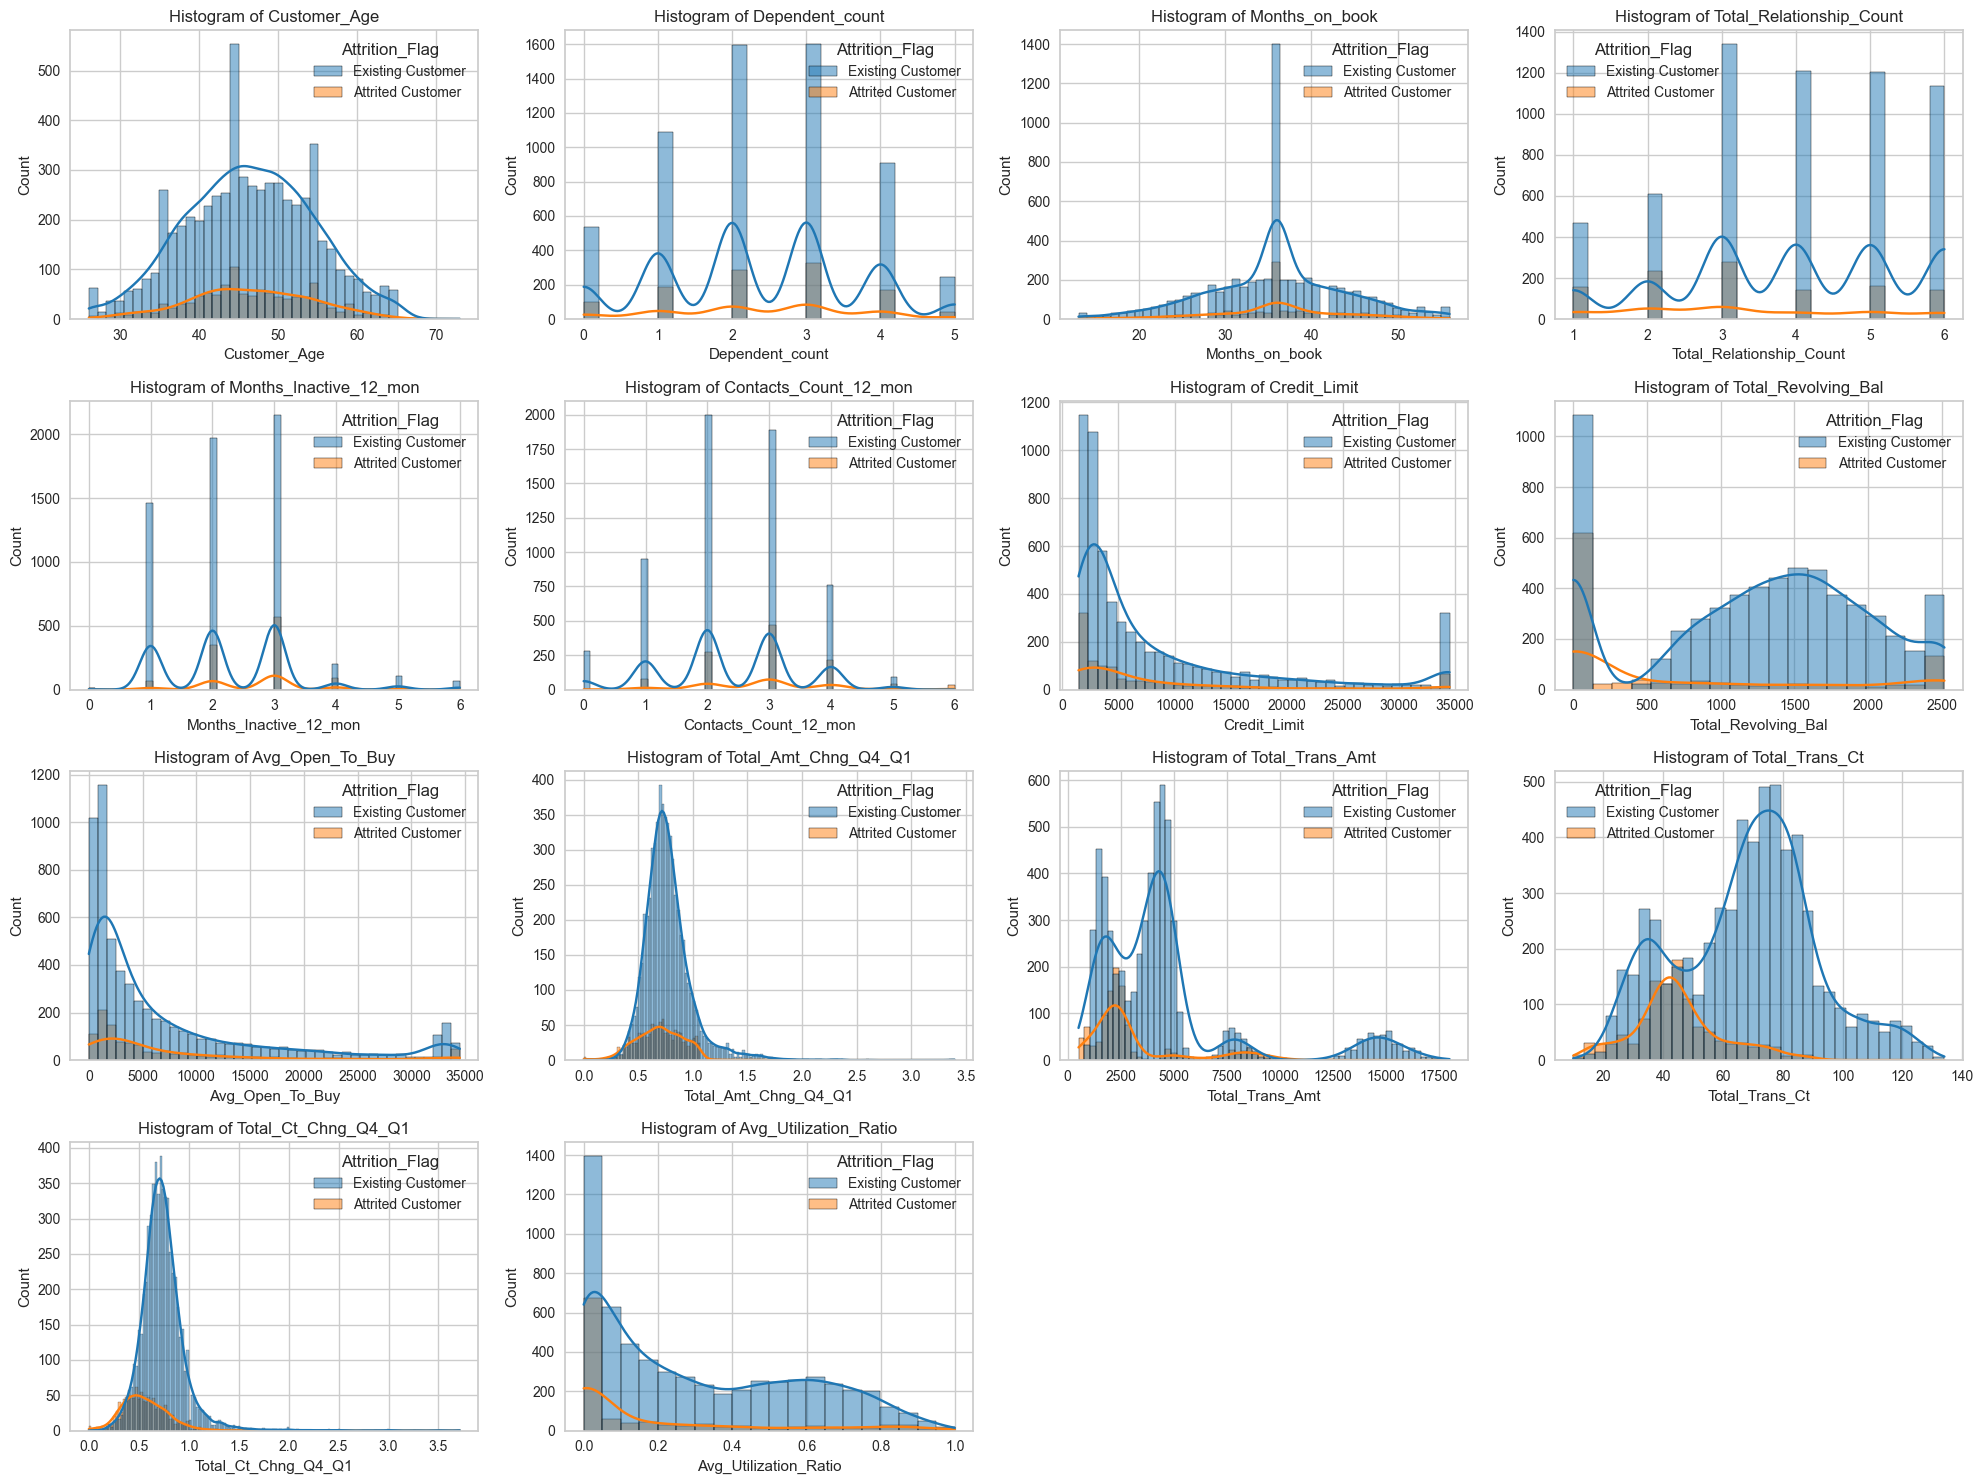

In [68]:
col = list(df_num.columns)
fig, axes= plt.subplots(4,4,figsize=(20, 15))
k=0
for i in range(4):
    for j in range(4):
        if (k< len(col)):
            sns.histplot(data=df,x=col[k],ax=axes[i,j],palette='tab10',kde=True,hue='Attrition_Flag')
            axes[i,j].set_title(f'Histogram of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

We can notice that Customer's Age is somewhat normally distributed, but many of the other features have positive skewness. In order to check the skewness we do the following.

In [69]:
df_num.skew()

Customer_Age               -0.034385
Dependent_count            -0.023956
Months_on_book             -0.080834
Total_Relationship_Count   -0.175114
Months_Inactive_12_mon      0.595216
Contacts_Count_12_mon      -0.015392
Credit_Limit                1.703572
Total_Revolving_Bal        -0.156537
Avg_Open_To_Buy             1.700330
Total_Amt_Chng_Q4_Q1        1.820480
Total_Trans_Amt             2.017977
Total_Trans_Ct              0.171167
Total_Ct_Chng_Q4_Q1         2.168512
Avg_Utilization_Ratio       0.673964
dtype: float64

Credit_Limit, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt and Total_Ct_Chng_Q4_Q1 are highly positively skewed. All the other features have little to negligible skewness.

# **`Outliers Detection`**

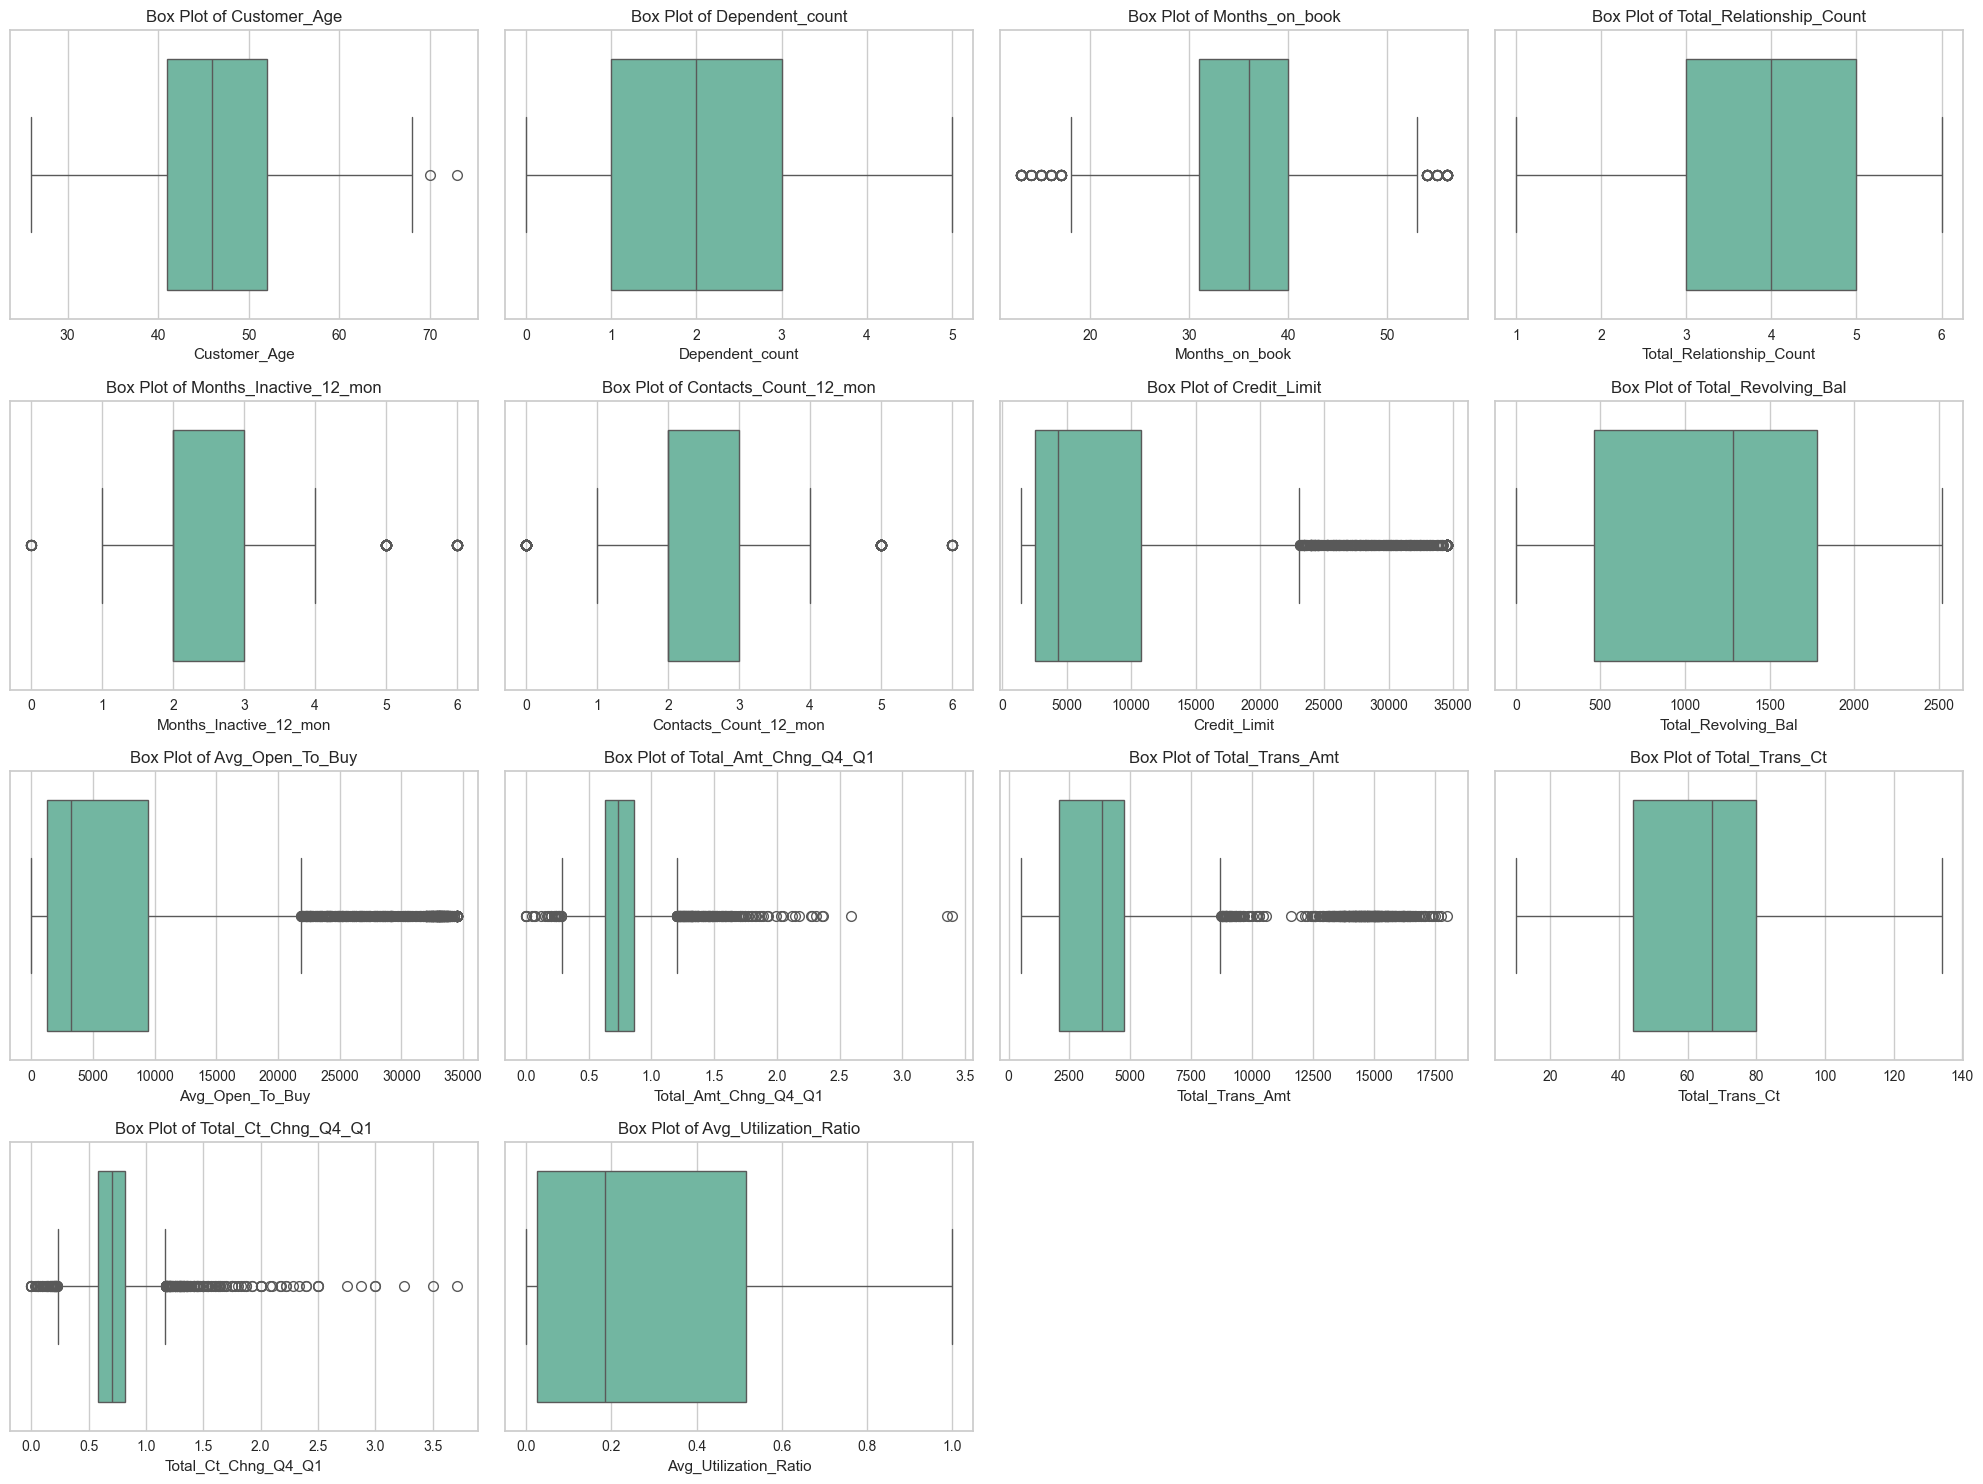

In [70]:
col = list(df_num.columns)
fig, axes= plt.subplots(4,4,figsize=(20, 15))
k=0
for i in range(4):
    for j in range(4):
        if (k< len(col)):
            sns.boxplot(data=df,x=col[k],ax=axes[i,j],palette='Set2')
            axes[i,j].set_title(f'Box Plot of {col[k]}')
            k+=1
        else:
            axes[i, j].axis('off')
plt.tight_layout();

In [71]:
def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)

In [72]:
df = df.loc[df['Credit_Limit'] >= outlier(df['Credit_Limit'])[0]]
df = df.loc[df['Credit_Limit'] <= outlier(df['Credit_Limit'])[1]]

df = df.loc[df['Months_on_book'] >= outlier(df['Months_on_book'])[0]]
df = df.loc[df['Months_on_book'] <= outlier(df['Months_on_book'])[1]]

df = df.loc[df['Avg_Open_To_Buy'] >= outlier(df['Avg_Open_To_Buy'])[0]]
df = df.loc[df['Avg_Open_To_Buy'] <= outlier(df['Avg_Open_To_Buy'])[1]]

df = df.loc[df['Total_Amt_Chng_Q4_Q1'] >= outlier(df['Total_Amt_Chng_Q4_Q1'])[0]]
df = df.loc[df['Total_Amt_Chng_Q4_Q1'] <= outlier(df['Total_Amt_Chng_Q4_Q1'])[1]]

df = df.loc[df['Total_Ct_Chng_Q4_Q1'] >= outlier(df['Total_Ct_Chng_Q4_Q1'])[0]]
df = df.loc[df['Total_Ct_Chng_Q4_Q1'] <= outlier(df['Total_Ct_Chng_Q4_Q1'])[1]]

df = df.loc[df['Total_Trans_Amt'] >= outlier(df['Total_Trans_Amt'])[0]]
df = df.loc[df['Total_Trans_Amt'] <= outlier(df['Total_Trans_Amt'])[1]]

In [73]:
df.shape

(5030, 20)

Now after cleaning the data and preprocessing it, we are left with 5030 datapoints and 21 columns, we shall move on to preparing it for clustering.

# **`Data Preparation`**

First we shall encode the categorical columns in order to achieve uniformity in the data.

In [74]:
from sklearn.preprocessing import LabelEncoder
cat  = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category','Attrition_Flag','Gender']
LE=LabelEncoder()
for i in cat:
    df[i]=df[[i]].apply(LE.fit_transform)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()

Next we scale the data.

In [77]:
scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

## *Dimentionality Reduction*

In order to visualize the clusters, it is not possible for a dataset with so many features, so we have to reduce the dimension of the dataset.

In [78]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_ds = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))

In [79]:
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,5030.0,0.000000e+00,1.729042,-3.419817,-1.371962,-0.207649,1.161373,5.799397
col2,5030.0,-2.260176e-17,1.533517,-4.234627,-0.983562,0.183935,0.953153,6.478125
col3,5030.0,-4.802873e-17,1.362287,-4.016405,-0.959483,-0.061478,0.931959,4.452501


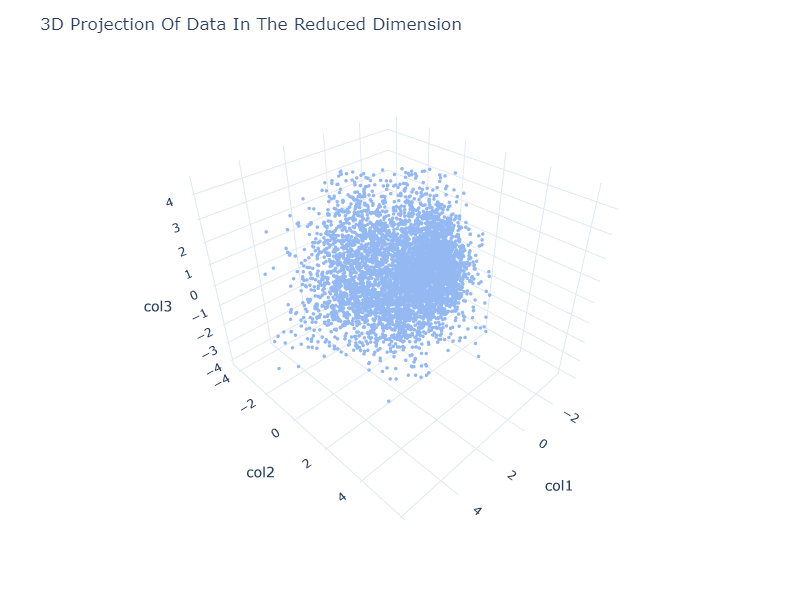

In [80]:
import plotly.express as px
px.defaults.template = "plotly_white"
fig = px.scatter_3d(PCA_ds, x='col1', y='col2', z='col3', color_discrete_sequence=['#94b8f2'])
fig.update_traces(marker=dict(size=2))
fig.update_layout(title="3D Projection Of Data In The Reduced Dimension", height=600, width=800)
fig.show("png")

Now we move onto model building.

# **`Model Building`**

In [81]:
np.random.seed(42)

## KMeans Clustering

In [82]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import axes3d

We use the KElbow VIsualizer to determine the optimal number of clusters required.

Elbow Method to determine the number of clusters to be formed:


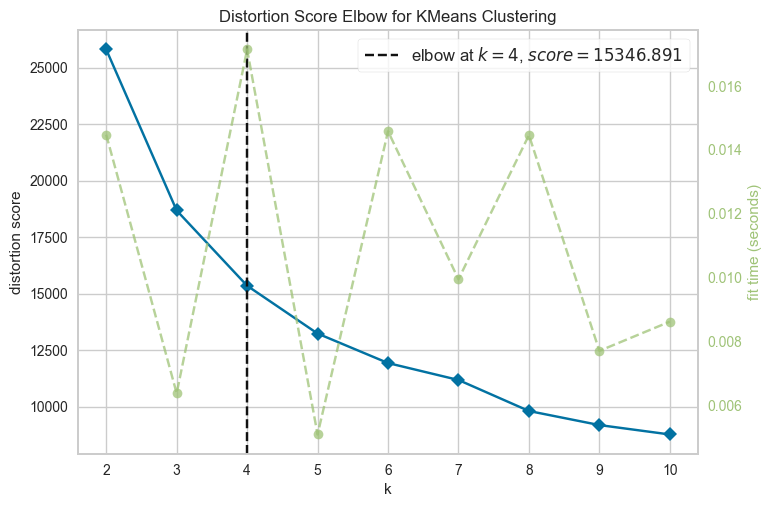

In [83]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

In [84]:
#building a model with the optimal number of clusters formed.

model = KMeans(n_clusters=4)

In [85]:
cluster_labels = model.fit_predict(PCA_ds)

In [86]:
df['cluster']=cluster_labels
PCA_ds['cluster']=cluster_labels

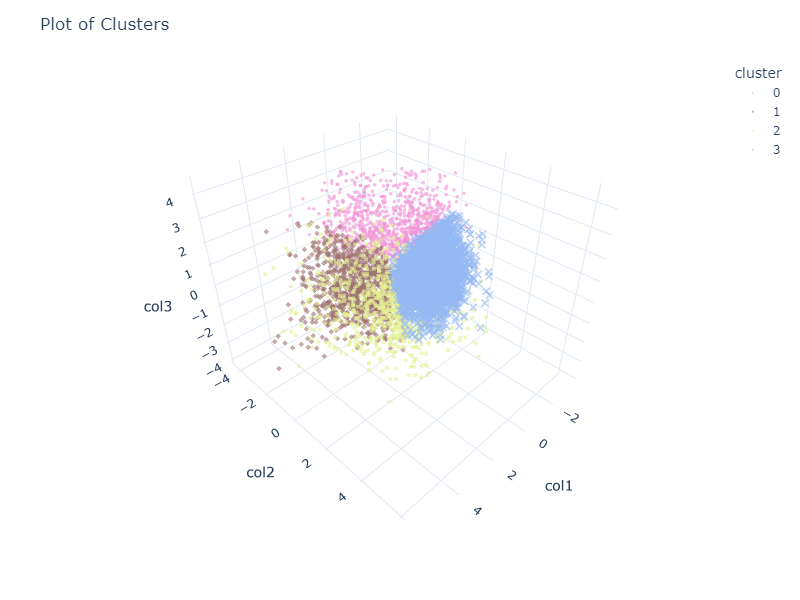

In [95]:
# Custom colors for clusters
cluster_colors = {0:"#f294d6",1: "#9E726F", 2:"#e5f294",3: "#94b8f2"}

PCA_ds["cluster"] = PCA_ds["cluster"].astype(str)
PCA_ds["color"] = PCA_ds["cluster"].map(cluster_colors)
# Creating a 3D scatter plot
fig = px.scatter_3d(PCA_ds.sort_values(by='cluster'), x='col1', y='col2', z='col3',
              color='cluster', color_discrete_sequence=cluster_colors, opacity=0.6, symbol='cluster')

fig.update_traces(marker=dict(size=2))

fig.update_layout(title="Plot of Clusters", height=600, width=800)
fig.show("png")

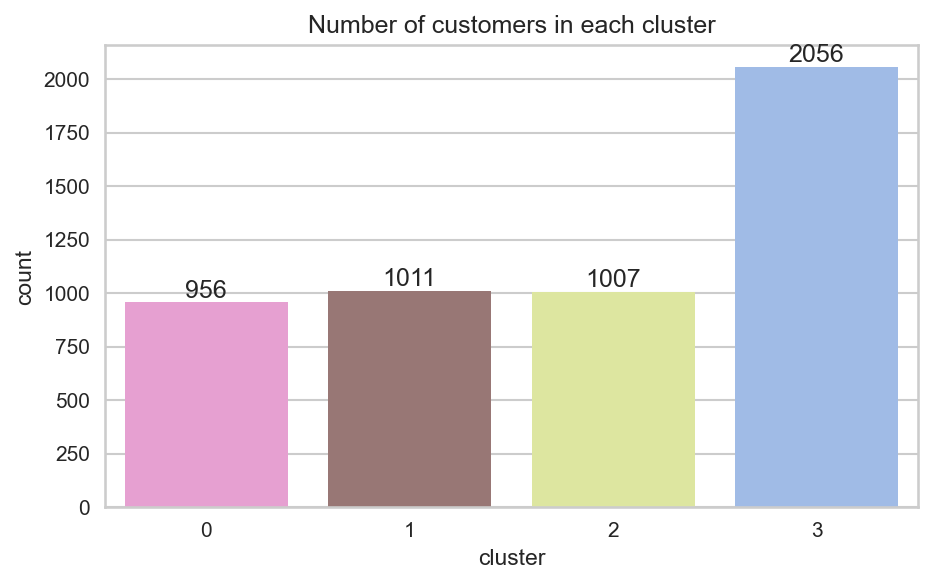

In [88]:
plt.figure(figsize=(7,4),dpi=150)
palette = [cluster_colors[int(cluster)] for cluster in sorted(PCA_ds['cluster'].unique())]
a = sns.countplot(data=df,x='cluster',palette=palette)
for i in a.containers: a.bar_label(i,)
plt.title('Number of customers in each cluster');

Cluster 3 has the highest number of customers.

Now it is time to make deductions about the characteristics of the customers. Let's get going!

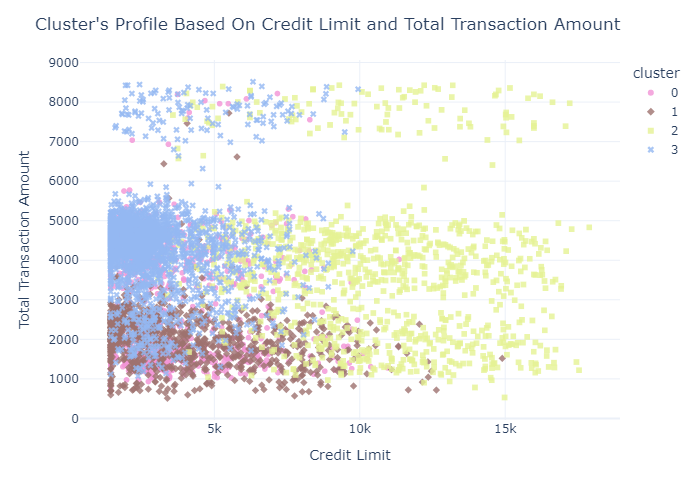

In [101]:
df["cluster"] = df["cluster"].astype(str)
fig = px.scatter(df.sort_values(by='cluster'), x="Credit_Limit", y="Total_Trans_Amt", 
                color='cluster', color_discrete_sequence=cluster_colors, opacity=0.8, symbol='cluster')
fig.update_yaxes(title_text="Total Transaction Amount")
fig.update_xaxes(title_text="Credit Limit")
fig.update_traces(showlegend=True)
fig.update_layout(title="Cluster's Profile Based On Credit Limit and Total Transaction Amount")
fig.show("png")

- **Cluster 0** is clustered in the left corner, which shows that the customers in this group have low to medium transaction amount (700-5300 dollars) and low credit limit (less than 6K dollars).
- **Cluster 1** is clustered in the lower left corner, which shows that the customers in this group have low transaction amount (1000-3000 dollars) and low credit limit (less than 8K dollars). Though there are some customers with high credit limit (greater than 8K dollars).
- **Cluster 2** is clustered in the right corner, which shows that the customers in this group have medium transaction amount (2000-5000 dollars) and high credit limit (6K - 16K dollars). Very few customers can be seen having high transaction amount and high credit limit.
- **Cluster 3** is clustered in the left corner, which shows that the customers in this group have medium transaction amount (3000-5500 dollars) and low credit card limit (less than 5K dollars). Very few customers can be seen having high transaction amount and low to medium credit limit.

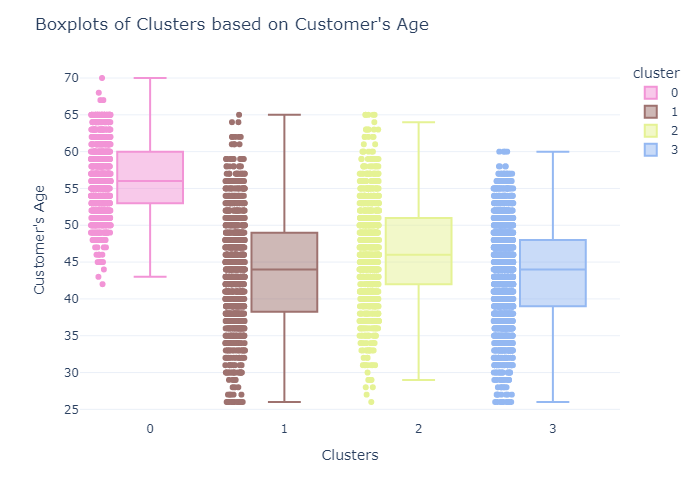

In [103]:
fig = px.box(df.sort_values(by='cluster'), x="cluster", y="Customer_Age", color='cluster', color_discrete_sequence=cluster_colors, points='all')
fig.update_yaxes(title_text="Customer's Age")
fig.update_xaxes(title_text="Clusters")
fig.update_layout(title = "Boxplots of Clusters based on Customer's Age")
fig.show("png")

- **Cluster 1**, **Cluster 2** and **Cluster 3** have customers aging between the range 26-65 years, with a median age of 44 years, 46 and 44 years respectively.
- **Cluster 0** have customers aging between the range 42-70 years, with a median age of 56 years.

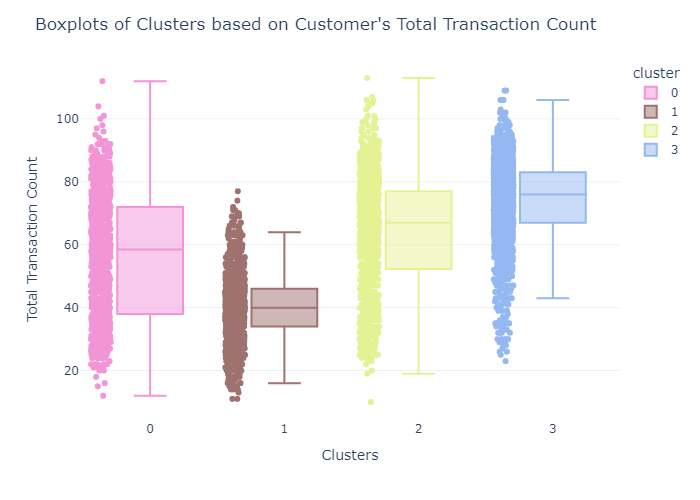

In [98]:
fig = px.box(df.sort_values(by='cluster'), x="cluster", y="Total_Trans_Ct", color='cluster', color_discrete_sequence=cluster_colors, points='all')
fig.update_yaxes(title_text="Total Transaction Count")
fig.update_xaxes(title_text="Clusters")
fig.update_layout(title = "Boxplots of Clusters based on Customer's Total Transaction Count")
fig.show("png")

- **Cluster 0** have total transaction count approximately ranging from 12-112, with the majority count lying between 12-112, having a median count of 64.5. Implies very low to very high transaction count.
- **Cluster 1** have total transaction count ranging from 11-74, with the majority count lying between 16-64, having a median count of 40. Implies very less to medium transaction count.
- **Cluster 2** have total transaction count approximately ranging from 10-113, with the majority count lying between 20-113, having a median count of 67. Implies very low to very high transaction count.
- **Cluster 3** have total transaction count approximately ranging from 23-109, with the majority count lying between 43-106, having a median count of 76. Implies medium to high transaction count.

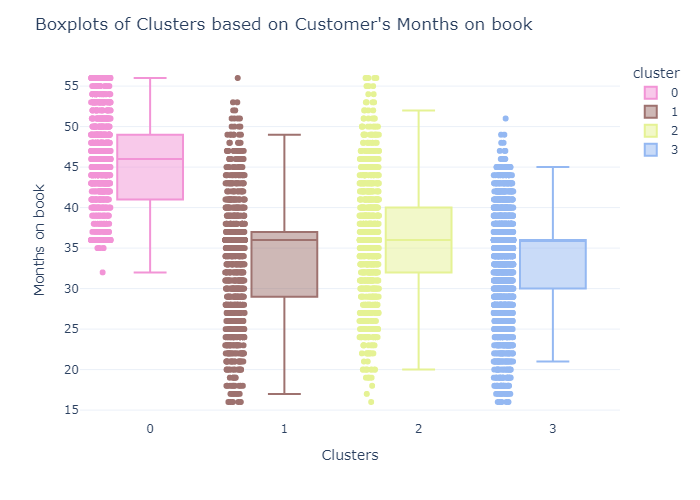

In [99]:
fig = px.box(df.sort_values(by='cluster'), x="cluster", y="Months_on_book", color='cluster', color_discrete_sequence=cluster_colors, points='all')
fig.update_yaxes(title_text="Months on book")
fig.update_xaxes(title_text="Clusters")
fig.update_layout(title = "Boxplots of Clusters based on Customer's Months on book")
fig.show("png")

- **Cluster 1**, **Cluster 2** and **Cluster 3** have customers who were on books for months between the range 16-56. 
- **Cluster 0** have customers who were on books for months between the range 29-56.

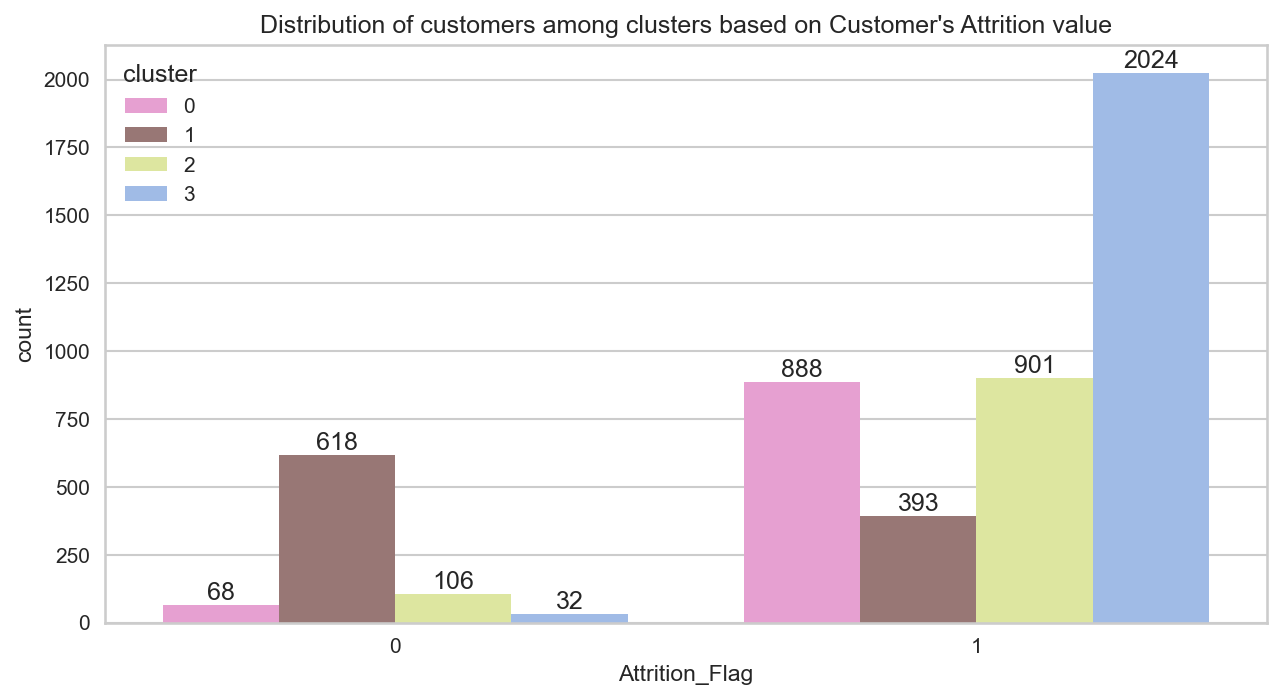

In [93]:
plt.figure(figsize=(10,5),dpi= 150)
palette = [cluster_colors[int(cluster)] for cluster in sorted(PCA_ds['cluster'].unique())]
a = sns.countplot(data=df.sort_values(by='cluster'),x='Attrition_Flag',hue='cluster',palette=palette)
for i in a.containers: a.bar_label(i,)
plt.title ("Distribution of customers among clusters based on Customer's Attrition value");

Here 1 denotes existing customer and 0 denotes attrited customer.
We notice that  
- In **Cluster 1** we have more attrited customers than existing customers,
- In **Group 3** we have very few attrited customers, and the number of existing customers is high,
- In **Group 0** and **Cluster 2**, we have less attrited customers and medium number of customers who are still existing.

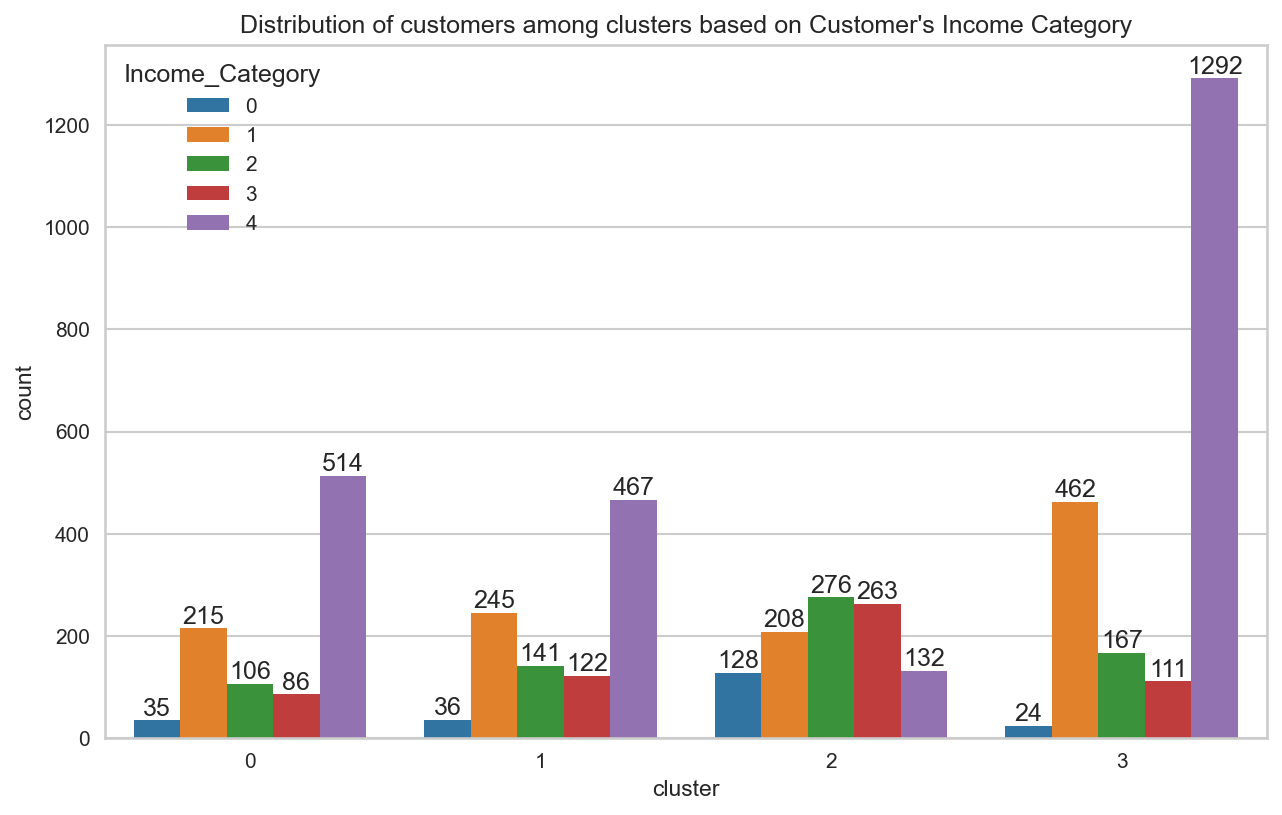

In [94]:
plt.figure(figsize=(10,6),dpi= 150)
palette = [cluster_colors[int(cluster)] for cluster in sorted(PCA_ds['cluster'].unique())]
a = sns.countplot(data=df.sort_values(by='cluster'),x='cluster',hue='Income_Category',palette='tab10')
for i in a.containers: a.bar_label(i,)
plt.title ("Distribution of customers among clusters based on Customer's Income Category");

- Maximum number of customers in **Cluster 0** has an income category 4, the count being 514.
- Maximum number of customers in **Cluster 1** has an income category 4, the count being 467, while there are some customers in category 1, 2 and 3, with very few customers having income category 0.
- Maximum number of customers in **Cluster 2** has an income category 2, the count being 245, while many (263) customers have category 3.
- Maximum number of customers in **Cluster 3** has an income categor 4, the count being 1292, which very high. 

# **`Customer Profiles`**

## Cluster 0:
- Customers have low to medium transaction amount (700-5300 dollars) and low credit limit (less than 6K dollars),
- aging between the range 42-70 years, with a median age of 56 years.
- have very low to very high total transaction count.
- customers were on books for a medium to high time duration (29-56 months).
- have less attrited customers and medium number of customers who are still existing.
- Maximum number of customers has an income category 4, the count being 514.

## Cluster 1:
- Customers have low transaction amount (1000-3000 dollars) and low credit limit (less than 8K dollars),
- aging between the range 26-65 years, with a median age of 44 years.
- have very low to medium total transaction count.
- customers were on books for a low to medium time duration (15-56 months).
- have more attrited customers than existing customers.
- Maximum number of customers has an income category 4, the count being 467, while there are some customers in category 1, 2 and 3, with very few customers having income category 0.

## Cluster 2:
- Customers have medium transaction amount (2000-5000 dollars) and high credit limit (6K - 16K dollars),
- aging between the range 26-65 years, with a median age of 46 years.
- have very low to very high total transaction count.
- customers were on books for a low to medium time duration (15-56 months).
- have less attrited customers and medium number of customers who are still existing.
- Maximum number of customers has an income category 2, the count being 245, while many (263) customers have category 3.

## Cluster 3:
- Customers have medium transaction amount (3000-5500 dollars) and low credit card limit (less than 5K dollars),
- aging between the range 26-65 years, with a median age of 44 years.
- have medium to high total transaction count.
- customers were on books for a low to medium time duration (15-56 months).
- have significantly high number of existing customers than attrited customers.
- Maximum number of customers has an income categor 4, the count being 1292, which very high. 